WAV file saved at: H:\Magdalena\behavioral experiments\looming sound escape\sounds\crescendo_50dB_max.wav


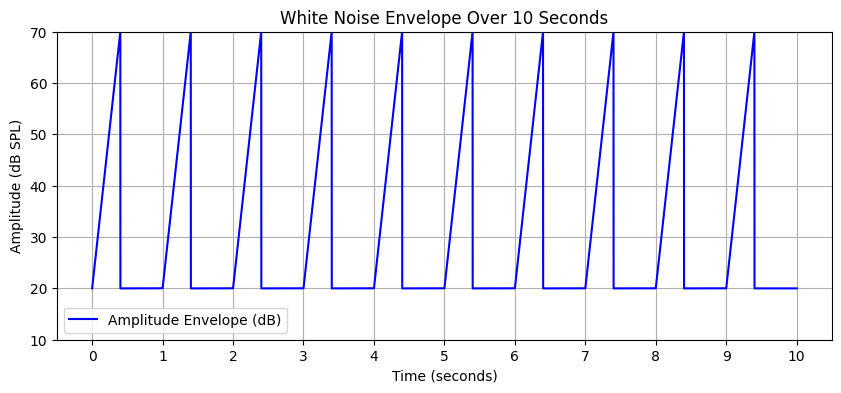

In [8]:
import numpy as np
import os
import soundfile as sf
import matplotlib.pyplot as plt

# Function to generate white noise audio motif, save as WAV, and plot the full 10s envelope
def generate_white_noise_wav_and_plot(output_dir):
    # Audio parameters
    sampling_rate = 44100  # Standard audio sampling rate (44.1 kHz)
    duration_motif = 1.0   # 1-second motif
    num_repeats = 10       # Repeat the motif 10 times
    total_duration = duration_motif * num_repeats  # Total duration = 10 seconds

    # Generate white noise
    n_samples_motif = int(sampling_rate * duration_motif)
    white_noise = np.random.normal(0, 1, n_samples_motif)

    # Define fade-in duration (0.4 sec)
    fade_in_samples = int(0.4 * sampling_rate)

    # Generate linear fade-in in dB (20 dB to 60 dB)
    fade_in_dB = np.linspace(20, 70, fade_in_samples) # change the second variable to the desired max dB
    envelope = np.ones(n_samples_motif)

    # Convert linear dB fade-in to amplitude
    envelope[:fade_in_samples] = 10 ** (fade_in_dB / 20)

    # Hold at 20 dB after 0.4 sec
    amp_start = 10 ** (20 / 20)  # 20 dB in amplitude
    envelope[fade_in_samples:] = amp_start  # Instant drop to 20 dB and stay

    # Apply envelope to white noise
    modulated_noise = white_noise * envelope

    # Repeat motif 10 times
    final_audio = np.tile(modulated_noise, num_repeats)

    # Repeat envelope 10 times for visualization
    full_envelope = np.tile(envelope, num_repeats)

    # Normalize to avoid clipping
    final_audio = final_audio / np.max(np.abs(final_audio))

    # Ensure output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Save as WAV (does not require FFmpeg)
    wav_path = os.path.join(output_dir, "crescendo_50dB_max.wav")
    sf.write(wav_path, final_audio, sampling_rate, format="WAV")

    print(f"WAV file saved at: {wav_path}")

    # Create time axis (for full 10 seconds)
    time_axis = np.linspace(0, total_duration, len(full_envelope))

    # Convert envelope to dB SPL
    envelope_db = 20 * np.log10(full_envelope)

    # Plot the full 10-second envelope in dB over time
    plt.figure(figsize=(10, 4))
    plt.plot(time_axis, envelope_db, label="Amplitude Envelope (dB)", color="b")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude (dB SPL)")
    plt.title("White Noise Envelope Over 10 Seconds")
    plt.ylim(10, 70)  # Keep the y-axis consistent with dB values
    plt.xticks(np.arange(0, total_duration + 1, 1))  # Tick marks at each second
    plt.grid()
    plt.legend()
    plt.show()

# Set your desired output directory
output_directory = r"H:\Magdalena\behavioral experiments\looming sound escape\sounds"  # Change this path
generate_white_noise_wav_and_plot(output_directory)


In [3]:
import os
import subprocess

def convert_wav_to_mp3_lame(input_dir, filename):
    """
    Converts a WAV file to MP3 using LAME encoder.

    Parameters:
        input_dir (str): The directory containing the WAV file.
        filename (str): The name of the WAV file (without extension).
    """
    # Construct full file paths
    wav_path = os.path.join(input_dir, f"{filename}.wav")
    mp3_path = os.path.join(input_dir, f"{filename}.mp3")

    # Check if WAV file exists
    if not os.path.exists(wav_path):
        print(f"Error: WAV file '{wav_path}' not found.")
        return

    # Define LAME command
    lame_command = f'lame -V2 "{wav_path}" "{mp3_path}"'

    try:
        # Run LAME command
        subprocess.run(lame_command, shell=True, check=True)
        print(f"✅ Converted {wav_path} → {mp3_path}")

    except subprocess.CalledProcessError as e:
        print(f"❌ Error: LAME conversion failed. {e}")

# Example usage
input_directory = r"H:\Magdalena\behavioral experiments\looming sound escape\sounds"  # Change this path
file_name = "pink_noise_100dB"  # Name of the WAV file without extension
convert_wav_to_mp3_lame(input_directory, file_name)


✅ Converted H:\Magdalena\behavioral experiments\looming sound escape\sounds\pink_noise_100dB.wav → H:\Magdalena\behavioral experiments\looming sound escape\sounds\pink_noise_100dB.mp3


WAV file saved at: H:\Magdalena\looming sound escape\sounds\white_noise_motif.wav


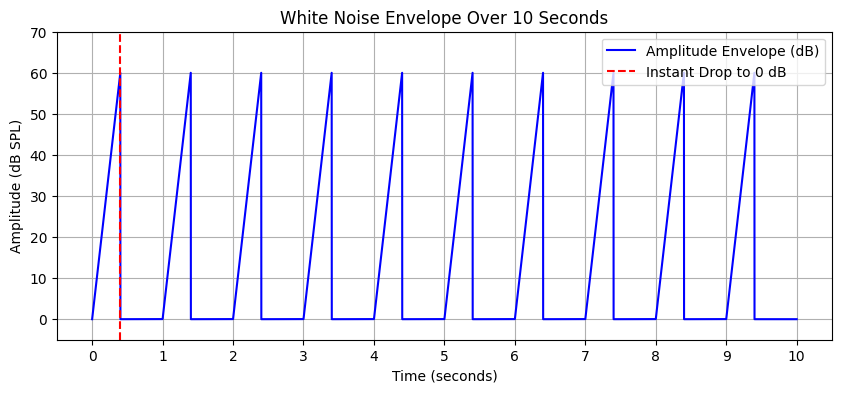

In [ ]:
# code is plotting a sound that increases from 0 dB to 60 dB and then it goes down to 0. Practically, the speakers are not good enough to decrease it to 0 so it decreases to 30

import numpy as np
import os
import soundfile as sf
import matplotlib.pyplot as plt

# Function to generate white noise audio motif, save as WAV, and plot the full 10s envelope
def generate_white_noise_wav_and_plot(output_dir):
    # Audio parameters
    sampling_rate = 44100  # Standard audio sampling rate (44.1 kHz)
    duration_motif = 1.0   # 1-second motif
    num_repeats = 10       # Repeat the motif 10 times
    total_duration = duration_motif * num_repeats  # Total duration = 10 seconds

    # Generate white noise
    n_samples_motif = int(sampling_rate * duration_motif)
    white_noise = np.random.normal(0, 1, n_samples_motif)

    # Define fade-in duration (0.4 sec)
    fade_in_samples = int(0.4 * sampling_rate)

    # Generate linear fade-in in dB (0 dB to 60 dB)
    fade_in_dB = np.linspace(0, 60, fade_in_samples)
    envelope = np.ones(n_samples_motif)

    # Convert linear dB fade-in to amplitude
    envelope[:fade_in_samples] = 10 ** (fade_in_dB / 20)

    # Hold at 0 dB after 0.4 sec (silence)
    amp_silence = 10 ** (0 / 20)  # 0 dB in amplitude (silence)
    envelope[fade_in_samples:] = amp_silence  # Instant drop to 0 dB and stay

    # Apply envelope to white noise
    modulated_noise = white_noise * envelope

    # Repeat motif 10 times
    final_audio = np.tile(modulated_noise, num_repeats)

    # Repeat envelope 10 times for visualization
    full_envelope = np.tile(envelope, num_repeats)

    # Normalize to avoid clipping
    final_audio = final_audio / np.max(np.abs(final_audio))

    # Ensure output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Save as WAV (does not require FFmpeg)
    wav_path = os.path.join(output_dir, "white_noise_motif.wav")
    sf.write(wav_path, final_audio, sampling_rate, format="WAV")

    print(f"WAV file saved at: {wav_path}")

    # Create time axis (for full 10 seconds)
    time_axis = np.linspace(0, total_duration, len(full_envelope))

    # Convert envelope to dB SPL
    envelope_db = 20 * np.log10(np.maximum(full_envelope, 1e-10))  # Avoid log(0) error

    # Plot the full 10-second envelope in dB over time
    plt.figure(figsize=(10, 4))
    plt.plot(time_axis, envelope_db, label="Amplitude Envelope (dB)", color="b")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude (dB SPL)")
    plt.title("White Noise Envelope Over 10 Seconds")
    plt.ylim(-5, 70)  # Show 0 dB clearly
    plt.xticks(np.arange(0, total_duration + 1, 1))  # Tick marks at each second
    plt.axvline(0.4, color="r", linestyle="--", label="Instant Drop to 0 dB")
    plt.grid()
    plt.legend()
    plt.show()

# Set your desired output directory
output_directory = r"H:\Magdalena\looming sound escape\sounds"  # Change this path
generate_white_noise_wav_and_plot(output_directory)


WAV file saved at: H:\Magdalena\looming sound escape\sounds/pink_noise_85dB.wav


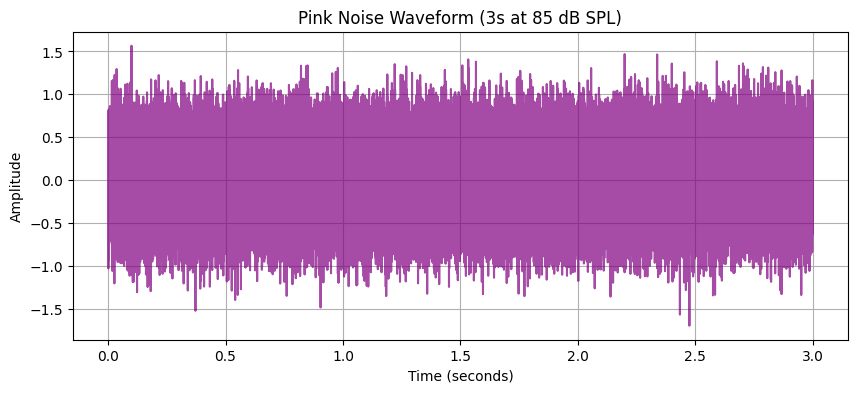

In [1]:
# 3 second pink noise at 85 dB



WAV file saved at: H:\Magdalena\looming sound escape\sounds/pink_noise_100dB.wav


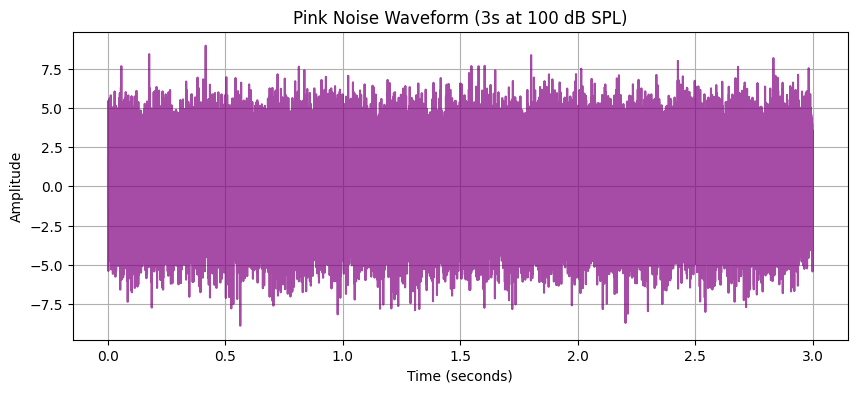

In [2]:
# 3 second pink noise at 100 dB

import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt

def generate_pink_noise(n_samples):
    """Generate pink noise using Voss-McCartney algorithm."""
    num_columns = 16  # Number of random sources
    array = np.random.randn(num_columns, n_samples)
    cumulative_sum = np.cumsum(array, axis=0)
    pink_noise = cumulative_sum[-1] / np.sqrt(num_columns)
    return pink_noise

def generate_pink_noise_wav(output_dir, filename="pink_noise_100dB.wav"):
    # Audio parameters
    sampling_rate = 44100  # 44.1 kHz standard sampling rate
    duration = 3.0         # 3 seconds
    n_samples = int(sampling_rate * duration)  # Total number of samples

    # Generate pink noise
    pink_noise = generate_pink_noise(n_samples)

    # Normalize to 100 dB SPL
    target_dB = 100  # Increased from 85 dB to 100 dB
    reference_pressure = 20e-6  # Reference pressure in Pascals
    rms_amplitude = np.sqrt(np.mean(pink_noise ** 2))  # Compute RMS
    scaling_factor = (10 ** (target_dB / 20)) * reference_pressure / rms_amplitude
    pink_noise *= scaling_factor

    # Save as WAV file
    wav_path = f"{output_dir}/{filename}"
    sf.write(wav_path, pink_noise, sampling_rate)

    print(f"WAV file saved at: {wav_path}")

    # Create time axis for plotting
    time_axis = np.linspace(0, duration, n_samples)

    # Plot the pink noise waveform
    plt.figure(figsize=(10, 4))
    plt.plot(time_axis, pink_noise, color="purple", alpha=0.7)
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.title("Pink Noise Waveform (3s at 100 dB SPL)")
    plt.grid()
    plt.show()

# Set output directory and generate pink noise WAV
output_directory = r"H:\Magdalena\looming sound escape\sounds"  # Change this path
generate_pink_noise_wav(output_directory)
